# Доверительные интервалы для коэффициентов

In [1]:
import pandas as pd
import numpy as np

import statsmodels.formula.api as smf

import matplotlib.pyplot as plt

# Не показывать Warning
import warnings
warnings.simplefilter(action='ignore', category=Warning)

<div style="background-color:Bisque; color:DarkBlue; padding:30px;">

<i><b><span style="color: purple">Доверительные интервалы для коэффициентов</span> </b><br>

Пусть $\gamma$ - доверительная вероятность (обычно 90%, 95%, 99%). Ей соответствует уровень значимости $\alpha=1-\gamma$

Доверительный интервал для коэффициента $\beta$
$$
	\mathcal{I}_\gamma=\left(\hat{\beta}-s.e.(\beta)\cdot t_{cr}\; ;\;\hat{\beta}+s.e.(\beta)\cdot t_{cr}\right)
$$

где $t_{cr}=t_{df=n-k-1}(\alpha)$

__Интерпретация:__ $P(\beta\in\mathcal{I}_\gamma)=\gamma$. 

__Замечание:__ 

* доверительный интервал можно рассматривать как "точно оценивания" коэффициента
* в зависимости от используемых $s.e.(\beta)$ __доверительный интервал м.б. неробастным и робастным__
* при выводе протокола подгонки модеоли методом `.summary(slim=False, alpha=0.05)` границы доверительных интервалов c $\gamma=1-\alpha$ для коэффициентов - это два последних столбца в таблице с коэффициентами
* границы доверительных интервалов для коэффициентов можно получить вызвав метод `.conf_int(alpha=0.05)`
 

**<span style="color:purple">Доверительный интервал и t-тест:</span>** доверительный интервал можно использовать для тестирования гипотезы 

$$
\begin{aligned}
	H_0:\beta&=\theta & &vs & H_1:\beta&\ne\theta
\end{aligned}
$$

__Вывод__: при уровне значимости $\alpha$ не отвергаем гипотезу $\iff \theta\in \mathcal{I}_\gamma$. В частности, коэффициент незначим $\iff 0\in \mathcal{I}_\gamma$

</div>

Для датасета `sleep75` рассмотрим регрессию `sleep~1+totwrk+age+I(age**2)+smsa+male+south+marr+union`

In [2]:
# загрузим данные
df = pd.read_csv('sleep75.csv')

## Неробастный доверительный интервал

Подгноим модель выведем протокол подгонки с `90%` доверительными интервала для коэффициентов

In [3]:
# спецификация модели
mod = smf.ols(formula='sleep~1+totwrk+age+I(age**2)+smsa+male+south+marr+union', data=df)
# подгонка модели с ковариационной матрицей по умолчанию (неробастной)
res_ols = mod.fit()

res_ols.summary(slim=True, alpha=0.1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sleep   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.122
No. Observations:                 706   F-statistic:                     13.28
Covariance Type:            nonrobust   Prob (F-statistic):           5.93e-18
===============================================================================
                  coef    std err          t      P>|t|       [0.05       0.95]
-------------------------------------------------------------------------------
Intercept    3622.9849    219.646     16.495      0.000    3261.219    3984.751
totwrk         -0.1665      0.018     -9.128      0.000      -0.197      -0.136
age            -7.0388     11.232     -0.627      0.531     -25.538      11.461
I(age ** 2)     0.1190      0.134      0.886      0.376      -0.102       0.340
smsa          -53.5584     33.163     -1.615      0.107    -108.180       1.063
male           85.1892     34.924      2.439      0.015      27.668     142.711
south          99.8639     41.890      2.384      0.017      30.869     168.858
marr           32.9936     42.051      0.785      0.433     -36.267     102.254
union          14.0891     38.147      0.369      0.712     -48.741      76.919
===============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
# неробастные доверительные интервалы
res_ols.conf_int(alpha=0.1).round(3)

,0,1
Intercept,3261.219,3984.751
totwrk,-0.197,-0.136
age,-25.538,11.461
I(age ** 2),-0.102,0.340
smsa,-108.180,1.063
male,27.668,142.711
south,30.869,168.858
marr,-36.267,102.254
union,-48.741,76.919


## Робастный доверительный интервал

Подгноим модель выведем протокол подгонки с `99%` доверительными интервала для коэффициентов

In [5]:
# спецификация модели
mod = smf.ols(formula='sleep~1+totwrk+age+I(age**2)+smsa+male+south+marr+union', data=df)
# подгонка модели с ковариационной матрицей по умолчанию (неробастной)
res_hc = mod.fit(cov_type='HC3')

res_hc.summary(slim=True, alpha=0.01)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sleep   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.122
No. Observations:                 706   F-statistic:                     11.08
Covariance Type:                  HC3   Prob (F-statistic):           8.38e-15
===============================================================================
                  coef    std err          z      P>|z|      [0.005      0.995]
-------------------------------------------------------------------------------
Intercept    3622.9849    239.245     15.143      0.000    3006.731    4239.239
totwrk         -0.1665      0.021     -7.967      0.000      -0.220      -0.113
age            -7.0388     11.565     -0.609      0.543     -36.829      22.751
I(age ** 2)     0.1190      0.135      0.880      0.379      -0.229       0.467
smsa          -53.5584     33.396     -1.604      0.109    -139.581      32.464
male           85.1892     35.965      2.369      0.018      -7.450     177.828
south          99.8639     42.698      2.339      0.019     -10.119     209.847
marr           32.9936     45.914      0.719      0.472     -85.274     151.261
union          14.0891     37.224      0.378      0.705     -81.794     109.973
===============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 3.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
# неробастные доверительные интервалы
res_hc.conf_int(alpha=0.01).round(3)

,0,1
Intercept,3006.731,4239.239
totwrk,-0.220,-0.113
age,-36.829,22.751
I(age ** 2),-0.229,0.467
smsa,-139.581,32.464
male,-7.450,177.828
south,-10.119,209.847
marr,-85.274,151.261
union,-81.794,109.973


## Визуализация доверительных интервалов

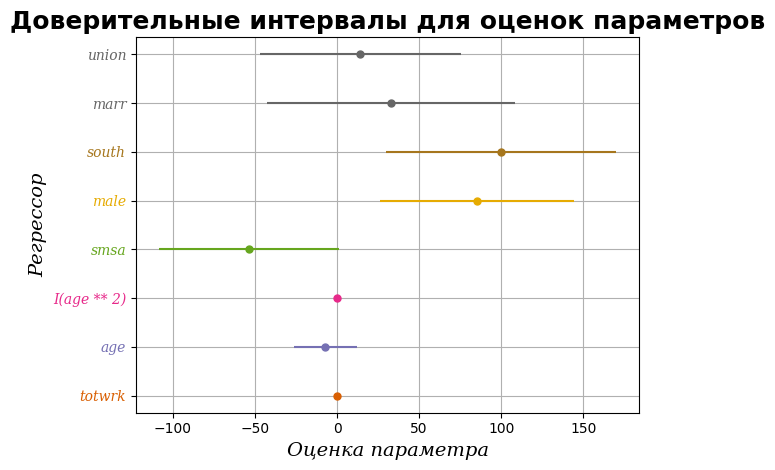

In [16]:
# спецификация модели
mod = smf.ols(formula='sleep~1+totwrk+age+I(age**2)+smsa+male+south+marr+union', data=df)
res = mod.fit()

#plt.style.use('dark_background') # черный фон

conf_int = res_hc.conf_int(alpha=0.1)
# Задаем палитру цветов для интервалов
colors = plt.cm.Dark2(np.linspace(0, 1, len(mod.exog_names)))
#colors = plt.cm.tab20(np.linspace(0, 1, len(mod.exog_names)))
# Построение графика
plt.figure()
for i in range(1, len(mod.exog_names)):
    plt.plot(res.params[i], i, marker='o', markersize=5, color=colors[i])  # Отмечаем оценки коэффициентов точками
    #plt.plot([conf_int.iloc[i, 0], conf_int.iloc[i, 1]], [i, i], marker='o', linestyle='', markersize=5, color=colors[i])  # Отмечаем границы доверительного интервала точками
    plt.hlines(y=i, xmin=conf_int.iloc[i, 0], xmax=conf_int.iloc[i, 1], color=colors[i])  # Соединяем границы интервала
    # Устанавливаем цвета для подписей оси y из списка цветов colors
    plt.gca().get_yticklabels()[i-1].set_color(colors[i])
plt.yticks(range(1, len(mod.exog_names)), mod.exog_names[1:], fontstyle='italic', family='serif') # подписи на оси y
plt.xlabel('Оценка параметра', fontsize=14, fontstyle='italic', family='serif')
plt.ylabel('Регрессор', fontsize=14, fontstyle='italic', family='serif')
plt.title('Доверительные интервалы для оценок параметров', fontsize=18, fontweight='bold')
plt.grid()
# оптимизируем поля и расположение объектов
plt.tight_layout()
plt.show()

## Доверителные интервалы и сравнение моделей

In [9]:
from statsmodels.iolib.summary2 import summary_col # вывод результатов тестирования

In [14]:
# специфицируем и подгоним модель на разных подвыборках с неробастной ковариационной матрицей
mod_overall = smf.ols(formula='sleep~1+totwrk+age+I(age ** 2)+smsa+male+marr+union', data=df)
res_overall_ols = mod_overall.fit()

mod_0 = smf.ols(formula='sleep~1+totwrk+age+I(age ** 2)+smsa+male+marr+union', data=df, subset=(df['south']==1) )
res_ols_0 = mod_0.fit()

mod_1 = smf.ols(formula='sleep~1+totwrk+age+I(age ** 2)+smsa+male+marr+union', data=df, subset=(df['south']==0))
res_ols_1 = mod_1.fit()


summary_col([res_north_ols, res_south_ols, res_overall_ols], model_names=['Север', 'Юг', 'Общая'],stars=True)

,Север,Юг,Общая
Intercept,3659.5995***,3404.8912***,3676.0604***
,(242.8748),(500.1015),(219.2462)
totwrk,-0.1827***,-0.0744,-0.1639***
,(0.0197),(0.0480),(0.0183)
age,-4.8519,-10.2864,-8.3661
,(12.4823),(25.4749),(11.2557)
I(age ** 2),0.0732,0.2409,0.1346
,(0.1491),(0.3050),(0.1345)
smsa,-65.2722*,8.3467,-72.5497**
,(35.2635),(99.4684),(32.3001)


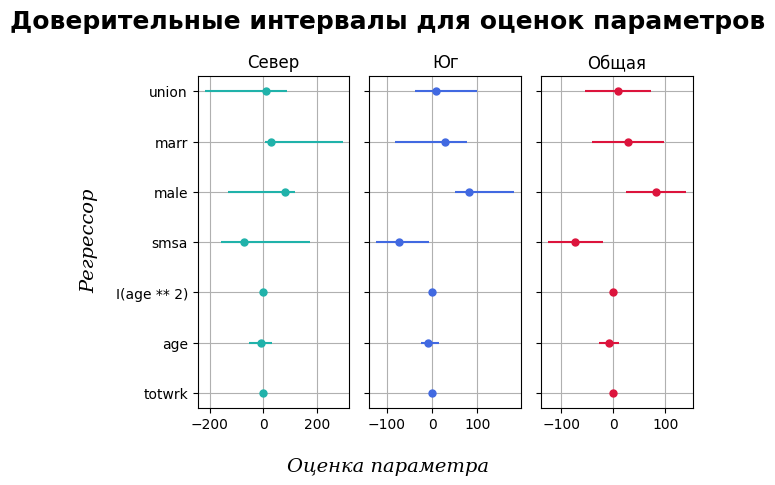

In [15]:
# создадим объект класса figure и axes
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=True) #figsize=(8, 4)
# common title
fig.suptitle('Доверительные интервалы для оценок параметров', fontsize=18, fontweight='bold')
# common axis labels
fig.supxlabel('Оценка параметра', fontsize=14, fontstyle='italic', family='serif')
fig.supylabel('Регрессор', fontsize=14, fontstyle='italic', family='serif')

ax1.set_title('Север')

conf_int = res_ols_0.conf_int(alpha=0.1)

# Построение графика
for i in range(1, len(mod_overall.exog_names)):
    ax1.plot(res_overall_ols.params[i], i, marker='o', markersize=5, color='lightseagreen')  # Отмечаем оценки коэффициентов точками
    ax1.hlines(y=i, xmin=conf_int.iloc[i, 0], xmax=conf_int.iloc[i, 1], color='lightseagreen')  # Соединяем границы интервала

ax1.grid()

ax2.set_title('Юг')

conf_int = res_ols_1.conf_int(alpha=0.1)

# Построение графика
for i in range(1, len(mod_overall.exog_names)):
    ax2.plot(res_overall_ols.params[i], i, marker='o', markersize=5, color='royalblue')  # Отмечаем оценки коэффициентов точками
    ax2.hlines(y=i, xmin=conf_int.iloc[i, 0], xmax=conf_int.iloc[i, 1], color='royalblue')  # Соединяем границы интервала

ax2.grid()

ax3.set_title('Общая')
conf_int = res_overall_ols.conf_int(alpha=0.1)

# Построение графика
for i in range(1, len(mod_overall.exog_names)):
    ax3.plot(res_overall_ols.params[i], i, marker='o', markersize=5, color='crimson')  # Отмечаем оценки коэффициентов точками
    ax3.hlines(y=i, xmin=conf_int.iloc[i, 0], xmax=conf_int.iloc[i, 1], color='crimson')  # Соединяем границы интервала

ax3.grid()

plt.yticks(range(1, len(mod_overall.exog_names)), mod_overall.exog_names[1:]) # подписи на оси y
# оптимизируем поля и расположение объектов
plt.tight_layout()
plt.show()